In [34]:
import pandas as pd

train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('titanic/test.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

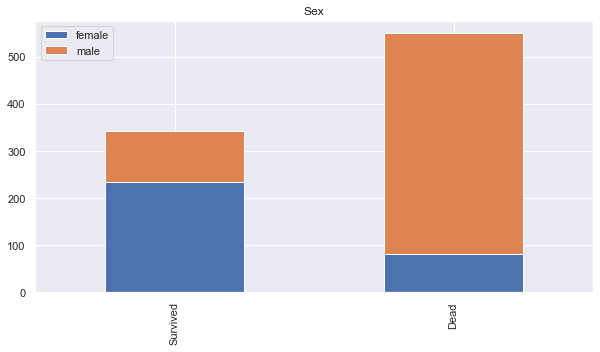

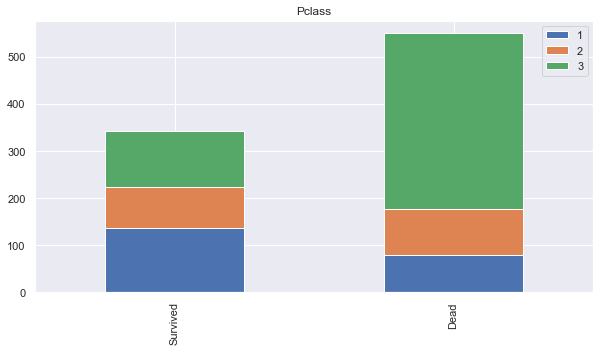

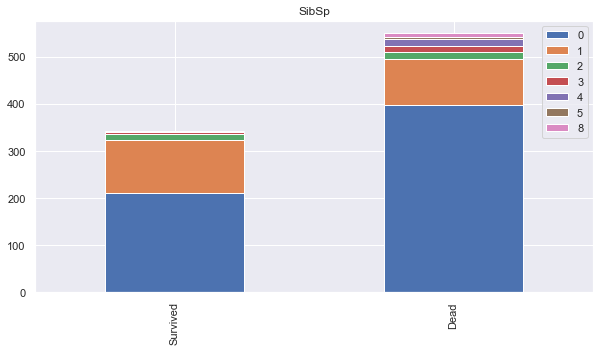

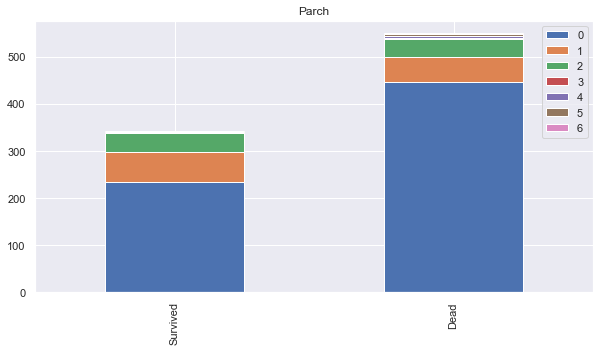

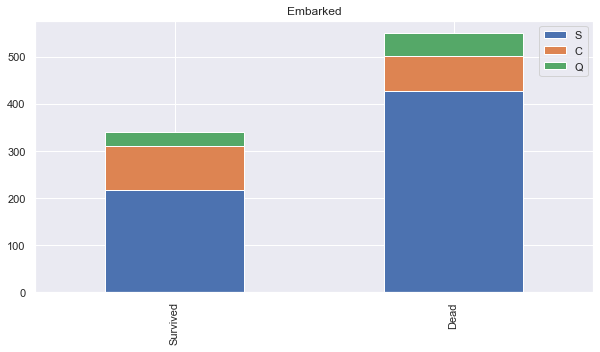

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
#     print(df)
    df.plot(kind='bar',stacked=True, figsize=(10,5))
    plt.title(feature)
bar_chart('Sex')
bar_chart('Pclass')
bar_chart('SibSp')
bar_chart('Parch')
bar_chart('Embarked')


In [38]:
train_test_data = [train, test] # combining train and test dataset
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
#     dataset['Title']['Mr'] = dataset['Title']['Dr']
#     dataset['Title']['Mr'] = dataset['Title']['Sir']
#     dataset['Title']['Miss'] = dataset['Title']['Lady']
#     dataset['Title']['Miss'] = dataset['Title']['Ms']
    dataset.loc[(dataset['Title'] == 'Dr'),'Title'] = "Mr"
    dataset.loc[(dataset['Title'] == 'Sir'),'Title'] = "Mr"
    dataset.loc[(dataset['Title'] == 'Lady'),'Title'] = "Miss"
    dataset.loc[(dataset['Title'] == 'Ms'),'Title'] = "Miss"
    
    

print(train_test_data)

print(len(train_test_data))
print("*"*100)
print(len(train),len(test))

[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...

In [39]:
print(train['Title'].value_counts())
print(test['Title'].value_counts())

Mr          525
Miss        184
Mrs         125
Master       40
Rev           6
Col           2
Major         2
Mlle          2
Mme           1
Countess      1
Jonkheer      1
Don           1
Capt          1
Name: Title, dtype: int64
Mr        241
Miss       79
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Name: Title, dtype: int64


In [40]:
title_map = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Rev": 4, "Col": 4, "Major": 4, "Mlle": 4,"Countess": 4,
                "Jonkheer": 4, "Don": 4, "Dona" : 4, "Mme": 4,"Capt": 4}
for data in train_test_data:
    data['Title'] = data['Title'].map(title_map)
max(train['Fare'])

512.3292

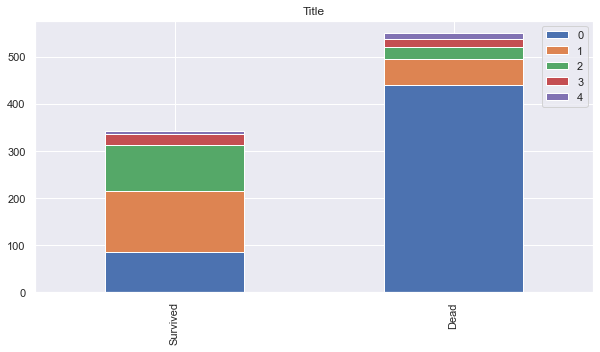

In [41]:
bar_chart('Title')

In [42]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

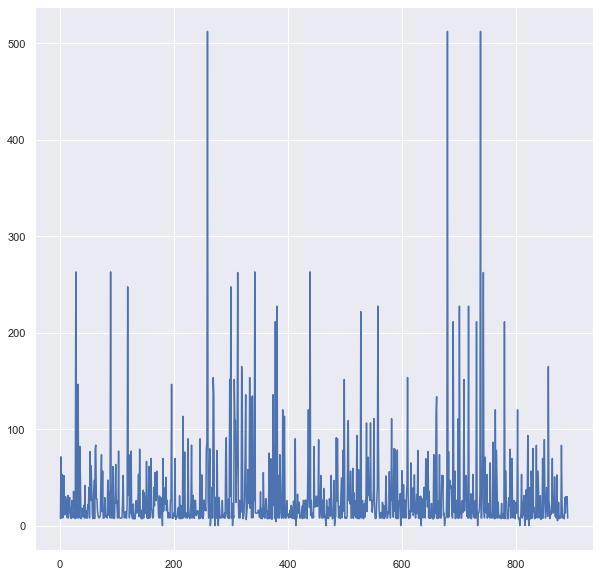

In [43]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot()
ax.plot(train['PassengerId'],train['Fare'])
plt.show()

In [44]:
# df3= pd.DataFrame()
df3 = test[['PassengerId','Fare']]
df3

,PassengerId,Fare
0,892,7.8292
1,893,7.0000
2,894,9.6875
3,895,8.6625
4,896,12.2875
...,...,...
413,1305,8.0500
414,1306,108.9000
415,1307,7.2500
416,1308,8.0500


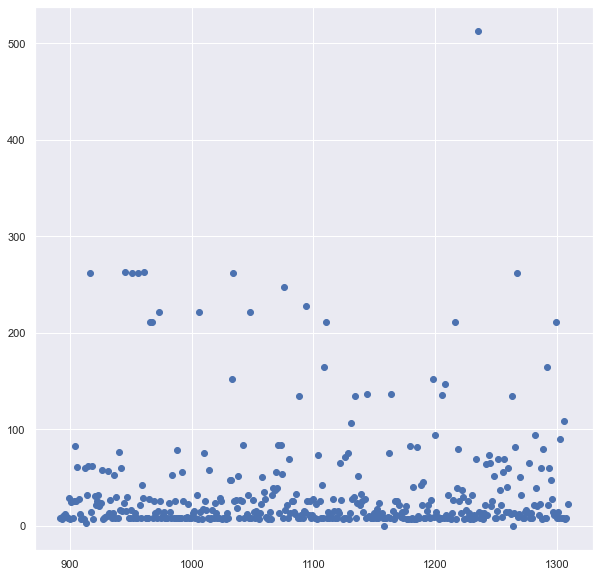

In [45]:
fig = plt.figure(figsize=((10,10)))
ax = plt.gca()
plt.scatter(df3['PassengerId'],df3['Fare'])
plt.show()

In [46]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby(["Pclass",'Age'])["Fare"].transform("mean"), inplace=True)
test["Fare"].fillna(test.groupby(["Pclass",'Age'])["Fare"].transform("mean"), inplace=True)


In [47]:
import numpy as np
for data in train_test_data:
    data['Fare'] = np.where(data['Fare'] <100, 0, data['Fare'])
    data['Fare'] = np.where(data['Fare'].between(100,200), 1, data['Fare'])
    data['Fare'] = np.where(data['Fare'].between(200,300), 2, data['Fare'])
    data['Fare'] = np.where(data['Fare'] > 300, 3, data['Fare'])
#     data['Fare'] = np.where(data['Fare'] <100, 0, data['Fare'])
#     data['Fare'] = np.where(data['Fare'] <100, 0, data['Fare'])
max(test['Fare'])
# test


3.0

In [48]:
train['Age'].fillna(train.groupby(['Title','Fare'])['Age'].transform('median'),inplace=True)
test['Age'].fillna(test.groupby(['Title','Fare'])['Age'].transform('median'),inplace=True)
train


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,0.0,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,0.0,C123,S,2
4,5,0,3,male,35.0,0,0,373450,0.0,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,0.0,NaN,S,4
887,888,1,1,female,19.0,0,0,112053,0.0,B42,S,1
888,889,0,3,female,20.0,1,2,W./C. 6607,0.0,NaN,S,1
889,890,1,1,male,26.0,0,0,111369,0.0,C148,C,0


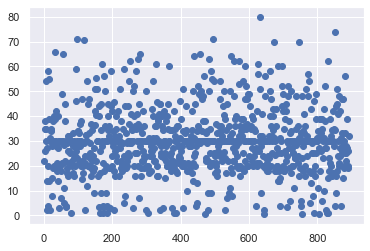

In [49]:
# for data in train_test_data:
#     data.loc[data['Age']<= 14]
plt.scatter(train['PassengerId'],train['Age'])
plt.show()

In [50]:
count = 0
for data in train_test_data:
    data.loc[data["Age"] <= 17, 'Age'] = 0
    data.loc[(data['Age']> 17) & (data['Age'] <= 30),'Age'] = 1
    data.loc[(data['Age']> 30) & (data['Age'] <= 49),'Age'] = 2
    data.loc[(data['Age']> 49) & (data['Age'] <= 63),'Age'] = 3
    data.loc[data['Age'] > 63, 'Age'] = 4
train
        
    

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,female,2.0,1,0,PC 17599,0.0,C85,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,0.0,C123,S,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1.0,0,0,211536,0.0,NaN,S,4
887,888,1,1,female,1.0,0,0,112053,0.0,B42,S,1
888,889,0,3,female,1.0,1,2,W./C. 6607,0.0,NaN,S,1
889,890,1,1,male,1.0,0,0,111369,0.0,C148,C,0


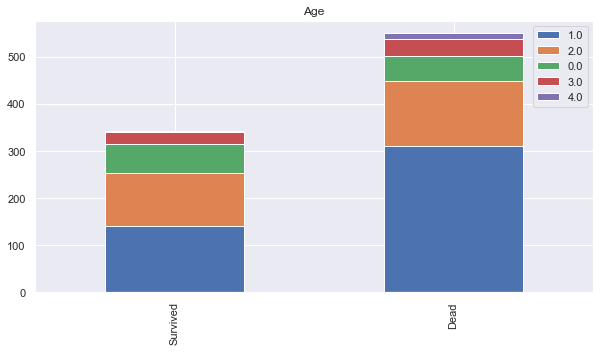

In [51]:

bar_chart('Age')

<AxesSubplot:>

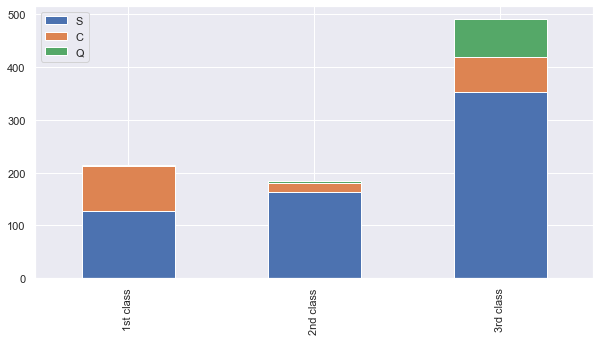

In [52]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [53]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [54]:
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,female,2.0,1,0,PC 17599,0.0,C85,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,0.0,C123,S,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1.0,0,0,211536,0.0,NaN,S,4
887,888,1,1,female,1.0,0,0,112053,0.0,B42,S,1
888,889,0,3,female,1.0,1,2,W./C. 6607,0.0,NaN,S,1
889,890,1,1,male,1.0,0,0,111369,0.0,C148,C,0


(0.0, 3.0)

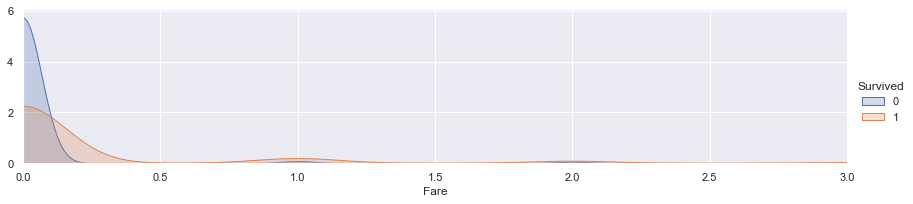

In [55]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0)

In [56]:
train['Cabin'].isnull().sum()

687

In [57]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]
train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,female,2.0,1,0,PC 17599,0.0,C,C,2
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,0.0,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,0.0,C,S,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,1.0,0,0,211536,0.0,NaN,S,4
887,888,1,1,female,1.0,0,0,112053,0.0,B,S,1
888,889,0,3,female,1.0,1,2,W./C. 6607,0.0,NaN,S,1
889,890,1,1,male,1.0,0,0,111369,0.0,C,C,0


<AxesSubplot:>

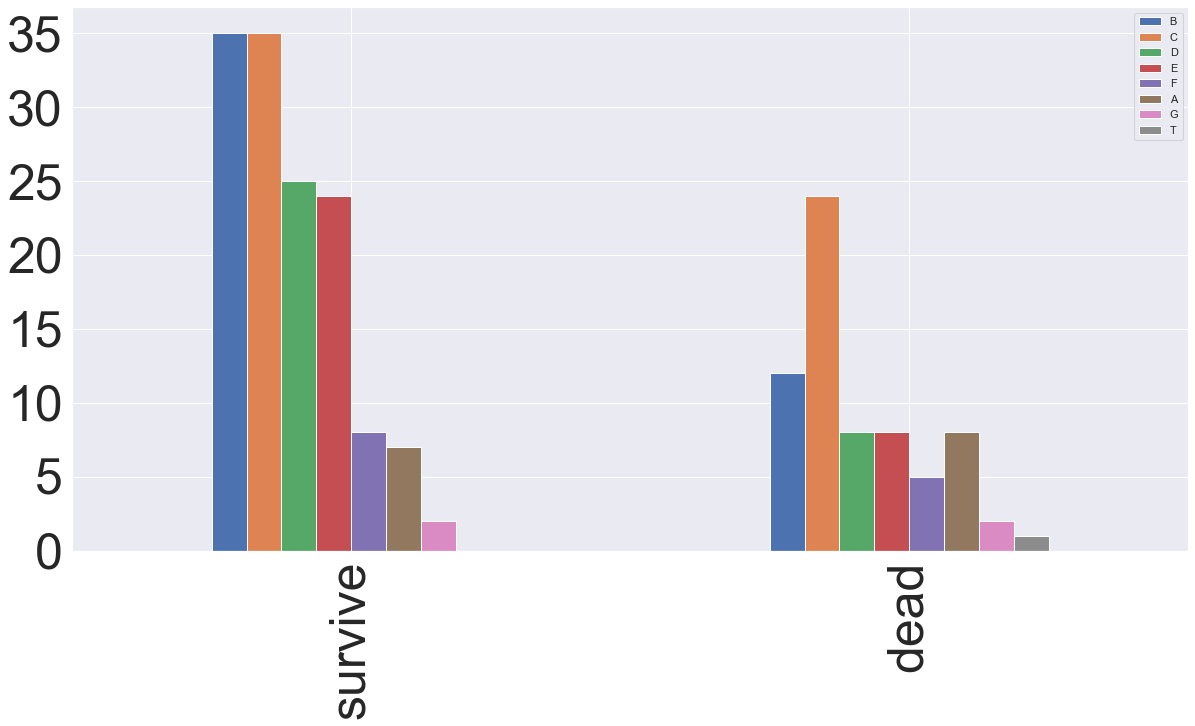

In [58]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass2
Cabin1 = train[train['Survived']==1]['Cabin'].value_counts()
Cabin2 = train[train['Survived']==0]['Cabin'].value_counts()
df = pd.DataFrame([Cabin1,Cabin2])
df.index = ['survive','dead']
df.plot(kind = 'bar',figsize=(20,10),fontsize=50)

          C     B     D     E     A     F    G    T
Cabin  36.0  32.0  30.0  30.0  15.0  13.0  4.0  1.0
Cabin  15.0   6.0   3.0   2.0   NaN   NaN  NaN  NaN
Cabin   8.0   7.0   NaN   NaN   NaN   NaN  NaN  NaN
Cabin   NaN   2.0   NaN   NaN   NaN   NaN  NaN  NaN


<AxesSubplot:>

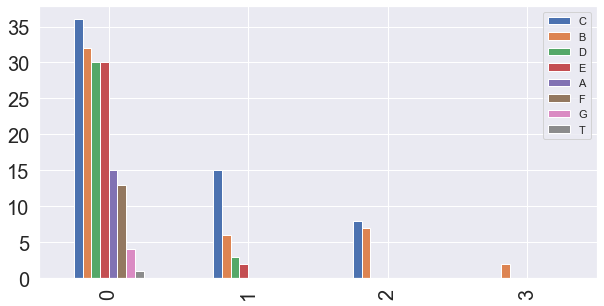

In [59]:
fare1 = train[train['Fare']==0]['Cabin'].value_counts()
fare2 = train[train['Fare']==1]['Cabin'].value_counts()
fare3 = train[train['Fare']==2]['Cabin'].value_counts()
fare4 = train[train['Fare']==3]['Cabin'].value_counts()
df_fare = pd.DataFrame([fare1,fare2,fare3,fare4])
print(df_fare)
df_fare.index= ['0','1','2','3']
df_fare.plot(kind='bar',figsize=(10,5),fontsize=(20))

In [60]:
cabin_mapping = {"C": 0, "B": 1, "D": 2, "E": 3, "T": 4, "G": 5, "F": 6, "A": 7}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [61]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Fare")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Fare")["Cabin"].transform("median"), inplace=True)

In [62]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)


In [63]:
features_drop= ['PassengerId','Ticket']

train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train_data = train.drop('Survived', axis=1)
train_data.shape, target.shape

NameError: name 'target' is not defined

In [64]:
target = train['Survived']

In [67]:
from xgboost import plot_importance
from xgboost import XGBClassifier
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits =10, shuffle=True, random_state = 0)
xgb = XGBClassifier()
xgb_param_grid = {'n_estimators':[100,200,300,400,500],
                 'learning_rate': [0.1, 0.01, 0.05, 0.2],
                 'max_depth': [4,8,12,16]}
xgb_grid = GridSearchCV(xgb, param_grid = xgb_param_grid,cv=10,scoring='accuracy', n_jobs=-1,verbose=1)
xgb_grid.fit(train_data,target)
scores_df = pd.DataFrame(xgb_grid.cv_results_)
print(scores_df)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:   42.9s
[Parallel(n_jobs=-1)]: Done 466 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  2.8min finished
C:\Users\jeawo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:21:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.170716      0.006028         0.004703    1.100711e-03   
1        0.295297      0.006078         0.004953    2.486228e-03   
2        0.438492      0.008753         0.004003    4.324521e-07   
3        0.576385      0.008139         0.004103    1.999143e-04   
4        0.709073      0.005769         0.004303    2.452137e-04   
..            ...           ...              ...             ...   
75       0.376251      0.008227         0.003853    2.293257e-04   
76       0.713326      0.009710         0.004353    2.293882e-04   
77       1.043296      0.017054         0.004803    3.318254e-04   
78       1

In [66]:
pip install xgboost

Fitting 10 folds for each of 80 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   20.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.1min finished
C:\Users\jeawo\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:03:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:03:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
    mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.190194      0.010446         0.006004        0.002336   
1        0.180471      0.007012         0.008356        0.005941   
2        0.181222      0.010609         0.004003        0.000837   
3        0.195281      0.0184

In [69]:
print(f'best_param: {xgb_grid.best_params_}')
print(f'best_acc : {xgb_grid.best_score_}')

best_param: {'learning_rate': 0.01, 'max_depth': 8, 'n_estimators': 100}
best_acc : 0.8316853932584267


In [71]:
from sklearn.svm import SVC
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.82222222 0.79775281 0.83146067 0.82022472 0.85393258 0.80898876
 0.83146067 0.85393258 0.82022472 0.86516854]
83.05


In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf_clf = RandomForestClassifier()
rf_param_grid = {'n_estimators':[100,200,300,400,500],
                 'min_samples_leaf': [5, 7, 9, 11],
                 'min_samples_split': [3, 5, 7, 9],
                 'max_depth': [8,12,16,20]}
rf_grid = GridSearchCV(rf_clf, param_grid = rf_param_grid,cv=10,scoring='accuracy', n_jobs=4,verbose=1)
rf_grid.fit(train_data,target)
scores_df = pd.DataFrame(rf_grid.cv_results_)
print(f'best_param: {rf_grid.best_params_}')
print(f'best_acc : {rf_grid.best_score_}')

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   58.5s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  3.8min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:  6.0min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 11.5min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 14.9min
[Parallel(n_jobs=4)]: Done 3200 out of 3200 | elapsed: 14.9min finished


best_param: {'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 100}
best_acc : 0.8294382022471909


In [87]:
test_real = pd.read_csv('titanic/test.csv')
test_real = test_real["PassengerId"]
test_real

# prediction = xgb_grid.predict(test_data)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [91]:
test['PassengerId'] = test_real
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,PassengerId
0,3,0,2.0,0,0,0.0,2.0,2,0,892
1,3,1,2.0,1,0,0.0,2.0,0,2,893
2,2,0,3.0,0,0,0.0,2.0,2,0,894
3,3,0,1.0,0,0,0.0,2.0,0,0,895
4,3,1,1.0,1,1,0.0,2.0,0,2,896
...,...,...,...,...,...,...,...,...,...,...
413,3,0,1.0,0,0,0.0,2.0,0,0,1305
414,1,1,2.0,0,0,1.0,0.0,1,4,1306
415,3,0,2.0,0,0,0.0,2.0,0,0,1307
416,3,0,1.0,0,0,0.0,2.0,0,0,1308


In [92]:
test_data = test.drop("PassengerId", axis=1).copy()
prediction = xgb_grid.predict(test_data)

In [93]:
submission = pd.DataFrame({
    "PassengerId": test['PassengerId'],
    'SUrvived': prediction
})
submission.to_csv('submission.csv',index=False)